# Results from DFT Calculations
This jupyter notebook extracts the results from the DFT calculations given from VASP.

## Bulk Calculations
The figure below illustrates a unit cell of a structure on the form AB$_2$ with a space group: Pnma 62, which illustrates an orthorombic structure containing 8 A(Ba $\&$ Sr)-atoms  (large green spheres) and 16 B (Si, Ge, C)-atoms (small blue spheres) that are contained in the unit cell.

<img src="../Results/Figures/cell.png">

### Convergence
In this section we are going to check convergence of various calculated properties and we will focus on the material BaSi$_2$ for the convergence tests, and base our calculation on these values throughout this project. 


#### Total Energy
We start by looking at the convergence of the total energy as a function of the energy cutoff.This can be visualized by plotting the total energy as a function of the cutoff energy and this isillustrated in Figure 1 below

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set()
from python_scripts.functions.data import readFilesFromDirectory, readEnergyFromFile


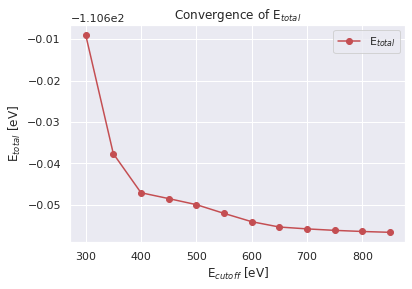

In [2]:
thisdir = '../Results/Bulk/BaSi2/Convergence'
filepaths, filenames = readFilesFromDirectory(thisdir)
data = readEnergyFromFile(filepaths, filenames)


total_energy = data['ecut1.txt']
cutoff = np.linspace(300, 850, 12)

plt.plot(cutoff, total_energy, "-or")
plt.legend(["E$_{total}$"])
plt.title("Convergence of E$_{total}$")
plt.xlabel("E$_{cutoff}$ [eV]")
plt.ylabel("E$_{total}$ [eV]")
plt.show()

#### Relative Energy

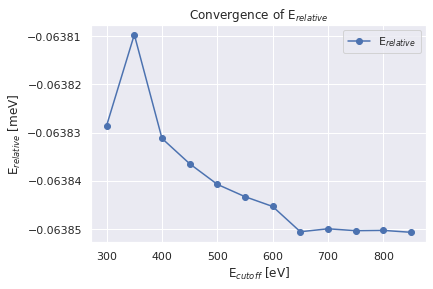

In [3]:
relative_energy = data['ecut1.txt'] - data['ecut2.txt']

plt.plot(cutoff, relative_energy, "-ob")
plt.legend(["E$_{relative}$"])
plt.title("Convergence of E$_{relative}$")
plt.xlabel("E$_{cutoff}$ [eV]")
plt.ylabel("E$_{relative}$ [meV]")
plt.show()

#### K-Density

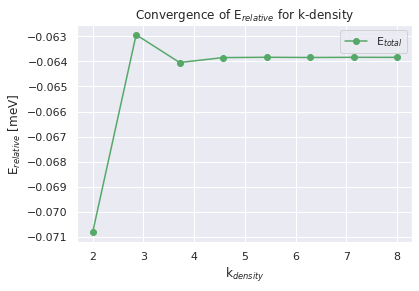

In [4]:
kpoints = np.linspace(2,8,8)
relative_kdensity = data['kdensity1.txt'] - data['kdensity2.txt']

plt.plot(kpoints, relative_kdensity, "-og")
plt.legend(["E$_{total}$"])
plt.title("Convergence of E$_{relative}$ for k-density")
plt.xlabel("k$_{density}$")
plt.ylabel("E$_{relative}$ [meV]")
plt.show()

## Layer Calculations

### Convergence

#### Vacuum 

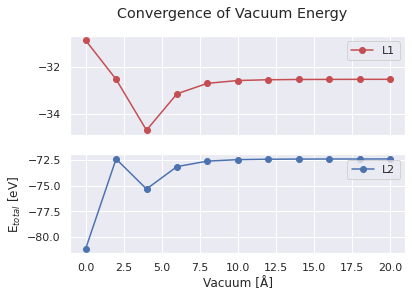

In [5]:
thisdir = '../Results/Layers/convergence_Results/L1'
filepaths, filenames = readFilesFromDirectory(thisdir)
data1 = readEnergyFromFile(filepaths, filenames)

thisdir = '../Results/Layers/convergence_Results/L2'
filepaths, filenames = readFilesFromDirectory(thisdir)
data2 = readEnergyFromFile(filepaths, filenames)


vacuum_energy1 = data1['vacuum.txt']
vacuum_energy2 = data2['vacuum.txt']
vacuum = np.linspace(0, 20, 11)

fig, (ax1, ax2) = plt.subplots(2, sharex=True)
fig.suptitle('Convergence of Vacuum Energy')

ax1.plot(vacuum, vacuum_energy1, "-or", label='L1')
ax1.legend(loc="upper right")
ax2.plot(vacuum, vacuum_energy2, "-ob", label='L2')
ax2.legend(loc="upper right")
plt.xlabel("Vacuum [Å]")
plt.ylabel("E$_{total}$ [eV]")
plt.show()


#### Total Energy
Both for 1 layer and 2 layers

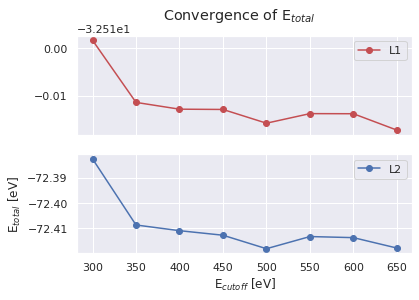

In [6]:
total_energy1 = data1['ecut1.txt']
total_energy2 = data2['ecut1.txt']
cutoff = np.linspace(300, 650, 8)

fig, (ax1, ax2) = plt.subplots(2, sharex=True)
fig.suptitle('Convergence of E$_{total}$')

ax1.plot(cutoff, total_energy1, "-or", label='L1')
ax1.legend(loc="upper right")
ax2.plot(cutoff, total_energy2, "-ob", label='L2')
ax2.legend(loc="upper right")
plt.xlabel("E$_{cutoff}$ [eV]")
plt.ylabel("E$_{total}$ [eV]")
plt.show()


#### Relative Energy

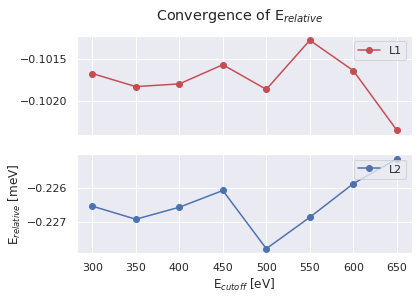

In [7]:
relative_energy1 = data1['ecut1.txt'] - data1['ecut2.txt']
relative_energy2 = data2['ecut1.txt'] - data2['ecut2.txt']
cutoff = np.linspace(300, 650, 8)

fig, (ax1, ax2) = plt.subplots(2, sharex=True)
fig.suptitle('Convergence of E$_{relative}$')

ax1.plot(cutoff, relative_energy1, "-or", label='L1')
ax1.legend(loc="upper right")
ax2.plot(cutoff, relative_energy2, "-ob", label='L2')
ax2.legend(loc="upper right")
plt.xlabel("E$_{cutoff}$ [eV]")
plt.ylabel("E$_{relative}$ [meV]")
plt.show()


#### Kdensity

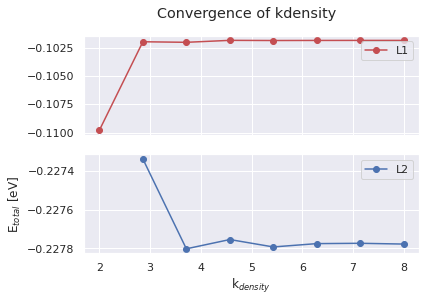

In [8]:
kdensity_energy1 = data1['kdensity1.txt'] - data1['kdensity2.txt']
kdensity_energy2 = data2['kdensity1.txt'] - data2['kdensity2.txt'][1:]
kponints = np.linspace(2, 9, 8)

fig, (ax1, ax2) = plt.subplots(2, sharex=True)
fig.suptitle('Convergence of kdensity')

ax1.plot(kpoints, kdensity_energy1, "-or", label='L1')
ax1.legend(loc="upper right")
ax2.plot(kpoints[1:], kdensity_energy2, "-ob", label='L2')
ax2.legend(loc="upper right")
plt.xlabel("k$_{density}$ ")
plt.ylabel("E$_{total}$ [eV]")
plt.show()


#### Extracting Energy calculation for single atoms

Assigning the energy values for the single atom and crystal calculation

In [9]:
thisdir = '../Results/atom_Energy'
filepaths, filenames = readFilesFromDirectory(thisdir)
data = readEnergyFromFile(filepaths, filenames)

barium = data['barium.txt']
silicon = data['silicon.txt']
carbon = data['carbon.txt']

basi2_atoms = 8*barium[0] + 16*silicon[0]
basi2_crystal = 4*barium[1] + 2*silicon[2]
basi2_cluster = 8*barium[0] + 4*silicon[1]

#graphite_atoms = 

### Interlayer Energy calculations
Extracting the data from the text files and visualize the data in plots

In [10]:
pbe = []
dft_d3 = []
lda = []
rev = []
vdw = []

thisdir = '../Results/Layers/L_L_distance/BaSi2/Run1'
filepaths, filenames = readFilesFromDirectory(thisdir)
data1 = readEnergyFromFile(filepaths, filenames)


for i in range(len(data1['DFT_D3.txt'])):
    pbe.append(data1['PBE.txt'][i])
    dft_d3.append(data1['DFT_D3.txt'][i])
    lda.append(data1['LDA.txt'][i])
    rev.append(data1['rev_vdW_DF2.txt'][i])
    vdw.append(data1['vdW_opt88.txt'][i])

thisdir = '../Results/Layers/L_L_distance/BaSi2/Run2'
filepaths, filenames = readFilesFromDirectory(thisdir)
data2 = readEnergyFromFile(filepaths, filenames)

for i in range(len(data1['DFT_D3.txt'])):
    pbe.append(data2['PBE.txt'][i])
    dft_d3.append(data2['DFT_D3.txt'][i])
    lda.append(data2['LDA.txt'][i])
    rev.append(data2['rev_vdW_DF2.txt'][i])
    vdw.append(data2['vdW_opt88.txt'][i])


pbe = np.array(pbe)
dft_d3 = np.array(dft_d3)
lda = np.array(lda)
rev = np.array(rev)
vdw = np.array(vdw)

# The starting distance between layers
origo = 4.641434669 - 4.368033409 # Between atom 3 and 4


x = np.linspace(-0.8, 1.0, 18)
x += origo
n = 24

E_c = basi2_atoms

df=pd.DataFrame({'x': x, 'pbe': (pbe-E_c)/n, 'dft_d3': (dft_d3-E_c)/n, 'lda': (lda-E_c)/n, 
    'rev': (rev-E_c)/n, 'vdw': (vdw-E_c)/n})
 


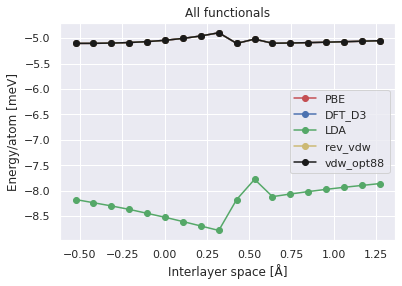

In [11]:
plt.plot(x, df['pbe'], "-or")
plt.plot(x, df['dft_d3'], "-ob")
plt.plot(x, df['lda'], "-og")
plt.plot(x, df['rev'], "-oy")
plt.plot(x, df['vdw'], "-ok")
plt.legend(["PBE", "DFT_D3", "LDA", "rev_vdw", "vdw_opt88"])
plt.title("All functionals")
plt.xlabel("Interlayer space [Å]")
plt.ylabel("Energy/atom [meV]")
plt.show()

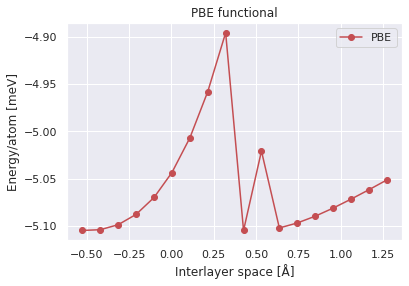

In [12]:
plt.plot(x, df['pbe'], "-or")
plt.legend(["PBE"])
plt.title("PBE functional")
plt.xlabel("Interlayer space [Å]")
plt.ylabel("Energy/atom [meV]")
plt.show()


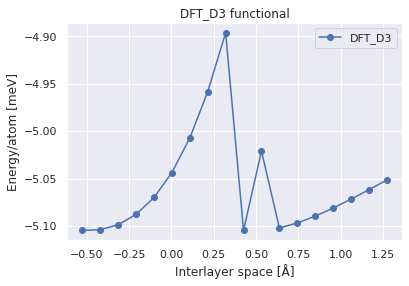

In [13]:
plt.plot(x, df['dft_d3'], "-ob")
plt.legend(["DFT_D3"])
plt.title("DFT_D3 functional")
plt.xlabel("Interlayer space [Å]")
plt.ylabel("Energy/atom [meV]")
plt.show()


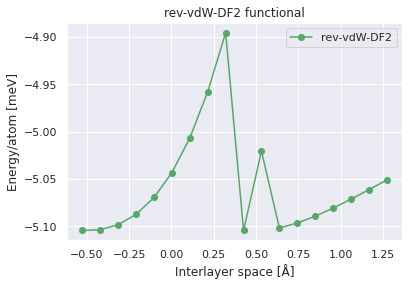

In [14]:
plt.plot(x, df['rev'], "-og")
plt.legend(["rev-vdW-DF2"])
plt.title("rev-vdW-DF2 functional")
plt.xlabel("Interlayer space [Å]")
plt.ylabel("Energy/atom [meV]")
plt.show()


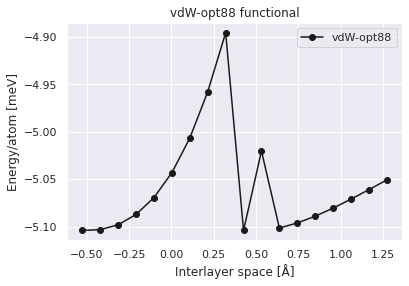

In [15]:
plt.plot(x, df['vdw'], "-ok")
plt.legend(["vdW-opt88"])
plt.title("vdW-opt88 functional")
plt.xlabel("Interlayer space [Å]")
plt.ylabel("Energy/atom [meV]")
plt.show()


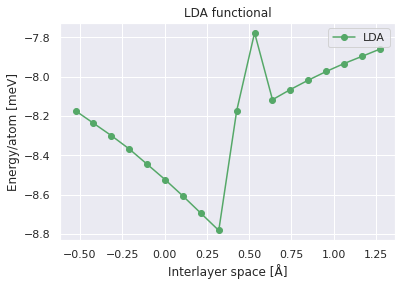

In [16]:
plt.plot(x, df['lda'], "-og")
plt.legend(["LDA"])
plt.title("LDA functional")
plt.xlabel("Interlayer space [Å]")
plt.ylabel("Energy/atom [meV]")
plt.show()

### Relaxation of Layer structures
Extracting the data from the text files and visualize the data in a table

In [17]:
thisdir = '../Results/Layers/text_files'
filepaths, filenames = readFilesFromDirectory(thisdir)


data = readEnergyFromFile(filepaths, filenames)


In [53]:
from tabulate import tabulate

l1 = data['L1_etot.txt']
l2 = data['L2_etot.txt']
l3 = data['L3_etot.txt']
l4 = data['L4_etot.txt']
#atoms = data['atoms.txt']

def E_c(l, string):
    if string == "atoms":
        x = l*(4*barium[0] + 8*silicon[0])
    elif string == "crystal":
        x = l*(2*barium[1] + 1*silicon[2])

    elif string == "cluster":
        x = l*(4*barium[0] + 2*silicon[1])
    
    else:
        x = 0
    return x

def evenlayer(lx, lt, E_c, layer):
    # Prints the values in a nice tabulated form
    le = []
    i = 1
    for l in lx:
        E_atoms = (l-E_c(layer, "atoms"))/(12*layer)
        E_crystal = (l-E_c(layer, "crystal"))/(12*layer)
        E_cluster = (l-E_c(layer, "cluster"))/(12*layer)
        if i == 4:
            column = 'Normal_Relax', l, l-lx[-1], E_atoms, E_crystal, E_cluster
        elif i == 5:
            column = 'Unrelaxed', l, l-lx[-1], E_atoms, E_crystal, E_cluster
        else:
            column = 'Relax_' + str(i), l, l-lx[-1], E_atoms, E_crystal, E_cluster
    
        le.append(column)
        i +=1
    print(tabulate(le, headers=[lt,"Etot", "Rel-Unrel", "E_atoms", "E_crystal", "E_cluster"]))

def oddlayer(lx, lt, E_c, layer):
    # Prints the values in a nice tabulated form
    lo = []
    for l in lx:
        E_atoms = (l-E_c(layer, "atoms"))/(12*layer)
        E_crystal = (l-E_c(layer, "crystal"))/(12*layer)
        E_cluster = (l-E_c(layer, "cluster"))/(12*layer)
        if l == lx[0]:
            column = 'Relax_1', l, l-lx[-1], E_atoms, E_crystal, E_cluster
        elif l == lx[-1]:
            column = 'Unrelaxed', l, l-lx[-1], E_atoms, E_crystal, E_cluster
        else:
            column = 'Normal_Relax', l, l-lx[-1], E_atoms, E_crystal, E_cluster
    
        lo.append(column)
    print(tabulate(lo, headers=[lt,"Etot", "Rel-Unrel", "E_atoms", "E_crystal", "E_cluster"]))



#### Tables of energy data

In [54]:
oddlayer(l1, "Layer 1", E_c, 1)


Layer 1           Etot    Rel-Unrel    E_atoms    E_crystal    E_cluster
------------  --------  -----------  ---------  -----------  -----------
Relax_1       -44.4619     -3.18539   -4.32475   -0.0332142     -2.12494
Normal_Relax  -44.4607     -3.1842    -4.32465   -0.0331147     -2.12484
Unrelaxed     -41.2766      0         -4.05931    0.232235      -1.85949


In [55]:
evenlayer(l2, "Layer 2", E_c, 2)

Layer 2           Etot    Rel-Unrel    E_atoms    E_crystal    E_cluster
------------  --------  -----------  ---------  -----------  -----------
Relax_1       -91.3016     -1.38574   -4.42383   -0.132287      -2.22401
Relax_2       -91.3016     -1.38574   -4.42383   -0.132287      -2.22401
Relax_3       -91.3016     -1.38574   -4.42383   -0.132287      -2.22401
Normal_Relax  -91.3006     -1.38468   -4.42378   -0.132242      -2.22396
Unrelaxed     -89.9159      0         -4.36609   -0.0745477     -2.16627


In [56]:
evenlayer(l4, "Layer 4", E_c, 4)

Layer 4           Etot    Rel-Unrel    E_atoms    E_crystal    E_cluster
------------  --------  -----------  ---------  -----------  -----------
Relax_1       -188.607     -1.26516   -4.54891    -0.257374     -2.3491
Relax_2       -188.607     -1.26516   -4.54891    -0.257374     -2.3491
Relax_3       -188.607     -1.26516   -4.54891    -0.257374     -2.3491
Normal_Relax  -188.605     -1.2628    -4.54887    -0.257325     -2.34905
Unrelaxed     -187.342      0         -4.52256    -0.231017     -2.32274
